<a href="https://colab.research.google.com/github/jinxiqinghuan/learn_pytorch/blob/main/%E9%BE%99%E6%9B%B2%E8%89%AF%E8%80%81%E5%B8%88%E8%AF%BE%E7%A8%8B%E7%AC%94%E8%AE%B0/%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E5%85%A5%E9%97%A8%EF%BC%88%E6%96%8B%E8%97%A4%E5%BA%B7%E6%AF%85%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 深度学习入门：基于Python的理论与实现

In [ ]:
import numpy as np
import matplotlib.pylab as plt

## 第二章 感知机

In [ ]:
# 与门
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1
 

In [ ]:
(AND(0, 0),AND(1, 0),AND(0, 1),AND(1, 1))

(0, 0, 0, 1)

In [ ]:
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

In [ ]:
w*x

array([0. , 0.5])

In [ ]:
np.sum(w*x) + b

-0.19999999999999996

这里把−θ命名为偏置b，但是请注意，偏置和权重w1、 w2的作用是不
一样的。具体地说， w1和w2是控制输入信号的重要性的参数，而偏置是调
整神经元被激活的容易程度（输出信号为1的程度）的参数

In [ ]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [ ]:
(AND(0, 0),AND(1, 0),AND(0, 1),AND(1, 1))

(0, 0, 0, 1)

In [ ]:
# 非门
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5]) # 仅权重和偏置与AND不同
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [ ]:
(NAND(0, 0), NAND(1, 0), NAND(0, 1), NAND(1, 1))

(1, 1, 1, 0)

In [ ]:
# 或门
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1 

In [ ]:
(OR(0, 0), OR(1, 0), OR(0, 1), OR(1, 1))

(0, 1, 1, 1)

In [ ]:
# 异或门
# 单层感知机不能实现异或门，只能采用多层感知机来实现
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [ ]:
(XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1))

(0, 1, 1, 0)

## 第三章 神经网络

In [ ]:
# 阶跃函数
def step_function(x):
  return np.array(x>0, dtype=np.int)

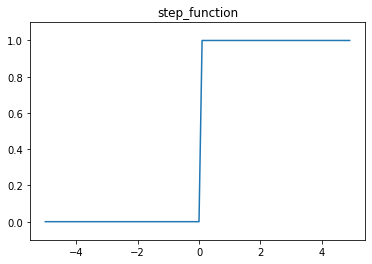

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.title('step_function')
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
x.shape

(100,)

In [ ]:
np.array(x>0, dtype=np.int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# sigmoid函数
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

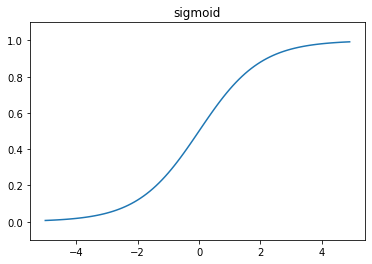

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.title('sigmoid')
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()